In [1]:
import os
import numpy as np
np.seterr(divide = 'ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## LOAD BANK LOAN DATA

In [2]:
pathDir = os.path.join(os.getcwd(), "DS1")

dataTrain = pd.read_csv(os.path.join(pathDir,"app_train.csv"))
dataTest = pd.read_csv(os.path.join(pathDir, "app_test.csv"))

In [3]:
# ====== CHECKING THE DATASET
dataTrain.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


## DATA PREPROCESSING

In [4]:
# ====== REMOVE UNIDENTIFIED FEATURE

dataTrain.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
dataTrain.drop(["a"], axis=1, inplace=True)

dataTest.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
dataTest.drop(["a"], axis=1, inplace=True)

In [5]:
# get the names of categorcal features
categFeatures = dataTrain.select_dtypes(include='object').columns

In [6]:
# ====== HANDLING INCONSISTENT DATA ENTRY

# for feature in dataTrain.columns:
#     if feature == 'LN_ID':
#         continue
#     print(dataTrain[feature].value_counts())

# get all the unique values in each feature
for feature in categFeatures:
    uniqueData = dataTrain[feature].unique()
    print("Unique data from %s:\n" % (feature), uniqueData)
    print("=============================================")

Unique data from CONTRACT_TYPE:
 ['Revolving loans' 'Cash loans']
Unique data from GENDER:
 ['F' 'M']
Unique data from INCOME_TYPE:
 ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Unemployed'
 'Student' 'Businessman']
Unique data from EDUCATION:
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique data from FAMILY_STATUS:
 ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Unique data from HOUSING_TYPE:
 ['With parents' 'House / apartment' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']
Unique data from WEEKDAYS_APPLY:
 ['TUESDAY' 'THURSDAY' 'WEDNESDAY' 'SUNDAY' 'MONDAY' 'FRIDAY' 'SATURDAY']
Unique data from ORGANIZATION_TYPE:
 ['Business Entity Type 3' 'Other' 'NA1' 'Culture' 'Construction'
 'Self-employed' 'University' 'Kindergarten' 'Business Entity Type 2'
 'Restaurant' 'Trade: type 3' 'Services' 'Housing'
 'Business Entity Type 1' 'Industry: type 9'

In [7]:
# ====== HANDLING CATEGORICAL FEATURES

# #1 manually change its value
# dataTrain.CONTRACT_TYPE=dataTrain.CONTRACT_TYPE.map({'Cash loans':0,'Revolving loans':1})
# dataTrain.CONTRACT_TYPE.value_counts()

In [8]:
# #2 change automatically with labelencoder
from sklearn.preprocessing import LabelEncoder

def replaceCategValues(data, categFeatures):
    lb = LabelEncoder()
    for feature in categFeatures:
        data[feature] = lb.fit_transform(data[feature])
    return data

In [9]:
dataTrain = replaceCategValues(dataTrain, categFeatures)
dataTest = replaceCategValues(dataTest, categFeatures)

Text(0.5, 1.0, 'Test Data')

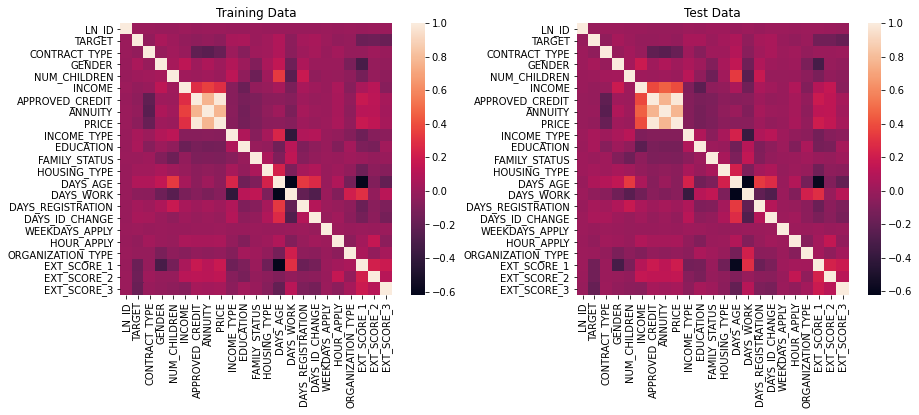

In [10]:
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize = (15, 5))
ax = axes.ravel()
g1 = sns.heatmap(dataTrain.corr(), square=True, ax=ax[0])
g1.set_title('Training Data')
g2 = sns.heatmap(dataTest.corr(), square=True, ax=ax[1])
g2.set_title('Test Data')
# plt.savefig("heatmap dataTrain.png")

In [11]:
# remove unnecessary features
# features = [
#     'GENDER', 'EDUCATION', 'FAMILY_STATUS', 'ORGANIZATION_TYPE',
#     'NUM_CHILDREN', 'HOUSING_TYPE', 'INCOME_TYPE',
#     'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION',
#     'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
#     'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
# ]

# dataTrain.drop(features, axis=1, inplace=True)
# dataTest.drop(features, axis=1, inplace=True)

In [12]:
# ====== HANDLING MISSING VALUES

def checkNullData(data):
    isnullData = data.isnull()
    for feature in isnullData.keys():
        if isnullData[feature].value_counts()[False] == isnullData.shape[0]:
            continue
        print(isnullData[feature].value_counts())
checkNullData(dataTrain)

False    61502
True         1
Name: ANNUITY, dtype: int64
False    61441
True        62
Name: PRICE, dtype: int64
True     34845
False    26658
Name: EXT_SCORE_1, dtype: int64
False    61369
True       134
Name: EXT_SCORE_2, dtype: int64
False    49264
True     12239
Name: EXT_SCORE_3, dtype: int64


In [13]:
# fill missing falue with mean of each feature
dataTrain.fillna(dataTrain.mean() , inplace=True)
dataTest.fillna(dataTest.mean(), inplace=True)

Text(0.5, 1.0, 'Test Data')

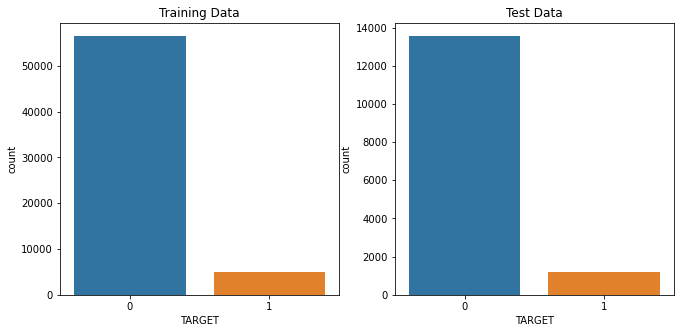

In [14]:
# ====== HANDLING IMBALANCED DATA TARGET

fig, axes = plt.subplots(1, 2, figsize=(11, 5))
ax = axes.ravel()

g1 = sns.countplot(x='TARGET', data=dataTrain, ax=ax[0])
g2 = sns.countplot(x='TARGET', data=dataTest, ax=ax[1])

g1.set_title("Training Data")
g2.set_title("Test Data")

In [15]:
#  random under-sampling
def randUnderSampling(data, targetColumn):
    targetCount = data[targetColumn].value_counts()
    for i in targetCount.index:
        if targetCount[i] == min(targetCount):
            continue
        print('Abundant class {} = {}'.format(targetCount.index[i], targetCount[i]))
        frac = min(targetCount)/targetCount[i]
        abundantClass = data[data[targetColumn] == i]
        index = abundantClass.sample(frac=1-frac, random_state=0).index
        data.drop(index, inplace=True)
    print('\nRandom Under-Sampling:')
    print(data[targetColumn].value_counts())
    return data

In [16]:
dataTrain = randUnderSampling(dataTrain, targetColumn="TARGET")
# dataTest = randUnderSampling(dataTest, targetColumn="TARGET")

Abundant class 0 = 56534

Random Under-Sampling:
1    4969
0    4969
Name: TARGET, dtype: int64


In [17]:
y = dataTrain.TARGET
X = dataTrain.drop(["TARGET", "LN_ID"], axis=1)

In [18]:
# ====== HANDLE SCALING AND NORMALIZATION
# scaling data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X)
scaledX = scaler.transform(X)  # scaled data train
scaledX = pd.DataFrame(scaledX, columns=X.columns)

In [19]:
# normalize data distribution

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)
normX = pt.fit_transform(scaledX) # normalize data train
normX = pd.DataFrame(normX, columns=X.columns)

In [20]:
import math
def plotDataDistribute(data):
    row = math.ceil(len(data.columns)/4)

    plt.figure(1, figsize=(15, 15), tight_layout=True)
    for feature, i in zip(data.columns, range(len(data.columns))):
        ax = plt.subplot(row, 4, i+1)
        sns.histplot(data[feature], kde=True, ax=ax)
        ax.set_title(feature)

Plot Original Data Train


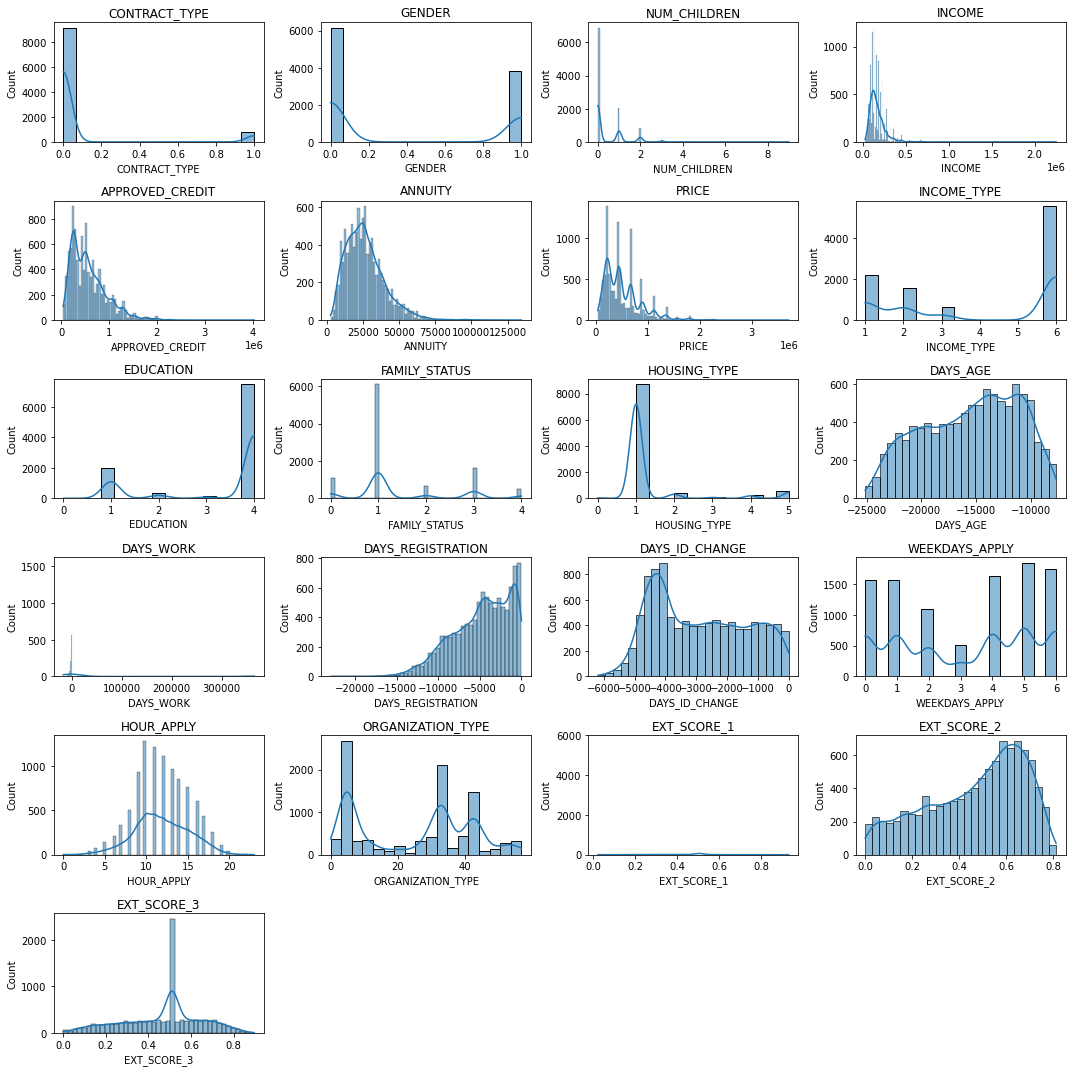

In [21]:
print("Plot Original Data Train")
plotDataDistribute(X)

Plot Scaled and Normalize Data Train


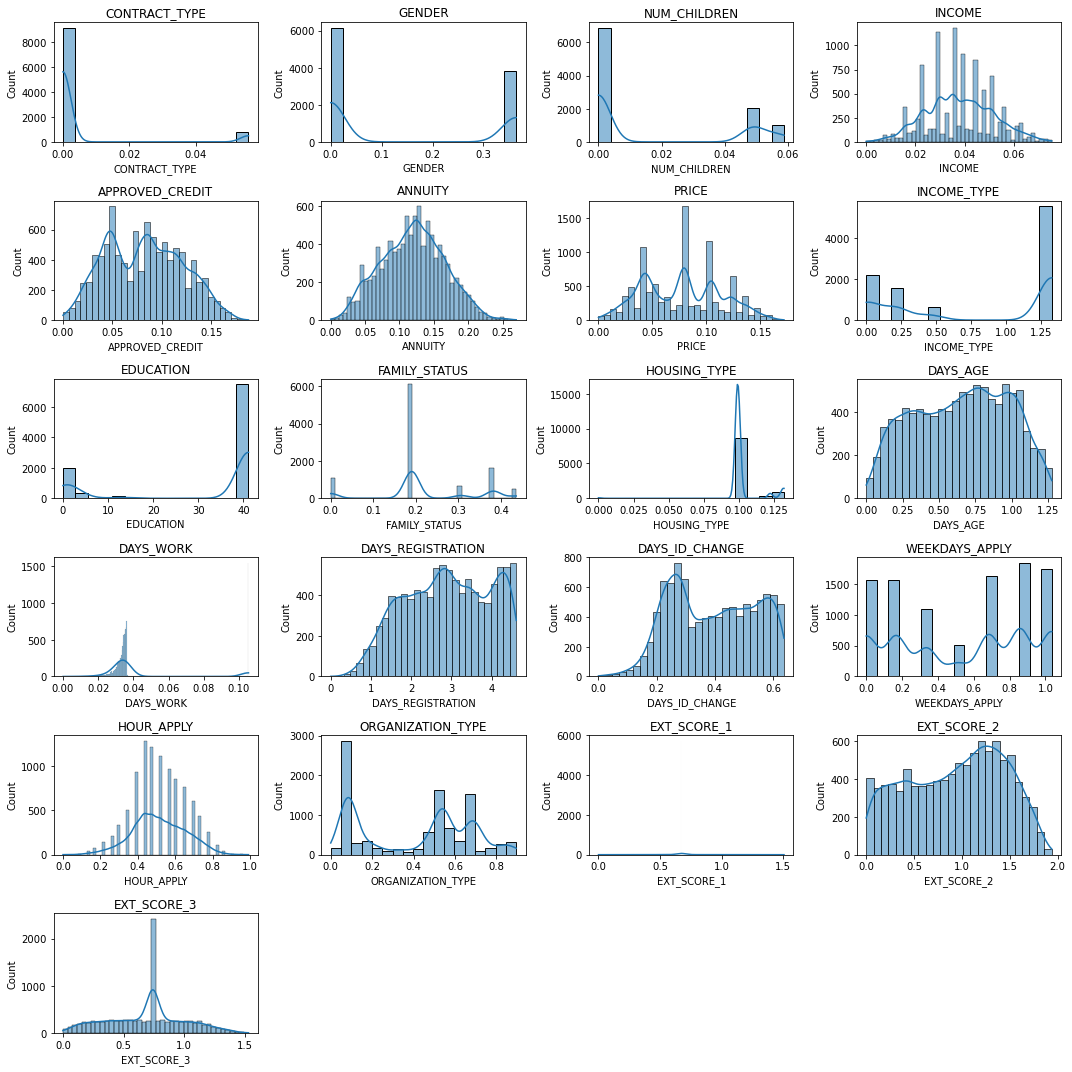

In [22]:
print("Plot Scaled and Normalize Data Train")
plotDataDistribute(normX)

## CREATE THE MODELS

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
	normX, y, test_size=0.25, random_state=128)

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [25]:
models=[]
models.append(("logreg",LogisticRegression(solver='liblinear', class_weight='balanced')))
models.append(("tree",DecisionTreeClassifier(class_weight="balanced", random_state=42)))
models.append(("lda",LinearDiscriminantAnalysis()))
models.append(("svc",SVC(class_weight="balanced", random_state=42)))
models.append(("knn",KNeighborsClassifier()))
models.append(("nb",GaussianNB()))
# models.append(("gpc",GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=0)))

## MODEL EVALUATION

In [26]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]
seed=128
scoring='accuracy'

In [27]:
# ====== CROSS-VALIDATION: EVALUATING ESTIMATOR PERFORMANCE

for name, model in models:
    kfold = KFold(
        shuffle=True, 
        random_state=seed,
        n_splits=5
    )
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("model %s\t: %.2f accuracy with a std. of %.2f" % (
        name,
        cv_result.mean(),
        cv_result.std()
    ))

model logreg	: 0.68 accuracy with a std. of 0.00
model tree	: 0.59 accuracy with a std. of 0.01
model lda	: 0.68 accuracy with a std. of 0.01
model svc	: 0.64 accuracy with a std. of 0.01
model knn	: 0.62 accuracy with a std. of 0.01
model nb	: 0.66 accuracy with a std. of 0.01


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
# ====== EVALUATE MODEL ACCURACY

for name, model in models:
    svc = model
    svc.fit(X_train, y_train)
    pred = svc.predict(X_val)
    print(name, ":\n")
    print("Accuracy Score = {:.2f}".format(accuracy_score(y_val, pred)))
    print("Confusion matrix = \n{}".format(confusion_matrix(y_val, pred)))
    print(classification_report(y_val, pred))
    print("\n======================================================\n")

logreg :

Accuracy Score = 0.66
Confusion matrix = 
[[846 393]
 [443 803]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1239
           1       0.67      0.64      0.66      1246

    accuracy                           0.66      2485
   macro avg       0.66      0.66      0.66      2485
weighted avg       0.66      0.66      0.66      2485



tree :

Accuracy Score = 0.57
Confusion matrix = 
[[714 525]
 [537 709]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1239
           1       0.57      0.57      0.57      1246

    accuracy                           0.57      2485
   macro avg       0.57      0.57      0.57      2485
weighted avg       0.57      0.57      0.57      2485



lda :

Accuracy Score = 0.66
Confusion matrix = 
[[832 407]
 [449 797]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1239
           1 

## PREDICTING DATA TEST WITH MODEL

In [30]:
X_test = dataTest.drop(["LN_ID", "TARGET"], axis=1)
y_test = dataTest["TARGET"]

In [31]:
# ====== DATA TEST PREPROCESSING

scaledX_test = scaler.transform(X_test) # scaled data test
scaledX_test = pd.DataFrame(scaledX_test, columns=X_test.columns)

normX_test = pt.transform(scaledX_test) #normalize data test
normX_test = pd.DataFrame(normX_test, columns=X_test.columns)

In [32]:
predOutput = pd.DataFrame()
predOutput["LN_ID"] = dataTest.LN_ID

In [33]:
for name, model in models:
    svc = model
    svc.fit(X_train, y_train)
    pred = svc.predict(normX_test).astype(int)
    predOutput[name] = pred
    print("model %s:\n" % (name))
    print("Accuracy Score = {:.2f}".format(accuracy_score(y_test, pred)))
    print("Confusion matrix = \n{}".format(confusion_matrix(y_test, pred)))
    # print(classification_report(y_test, pred))
    print("\n======================================================")

model logreg:

Accuracy Score = 0.70
Confusion matrix = 
[[9577 3981]
 [ 445  758]]

model tree:

Accuracy Score = 0.58
Confusion matrix = 
[[7897 5661]
 [ 487  716]]

model lda:

Accuracy Score = 0.70
Confusion matrix = 
[[9559 3999]
 [ 432  771]]

model svc:

Accuracy Score = 0.69
Confusion matrix = 
[[9561 3997]
 [ 521  682]]

model knn:

Accuracy Score = 0.66
Confusion matrix = 
[[9048 4510]
 [ 524  679]]

model nb:

Accuracy Score = 0.65
Confusion matrix = 
[[8774 4784]
 [ 426  777]]



In [34]:
predOutput = predOutput.merge(dataTest[['LN_ID', 'TARGET']], how='left', on="LN_ID")
print(predOutput.shape)
predOutput.dropna()
predOutput.head(10)

(14761, 8)


,LN_ID,logreg,tree,lda,svc,knn,nb,TARGET
0,219092,1,0,1,1,0,1,0
1,141577,0,0,0,0,0,0,0
2,180205,0,0,0,0,0,0,0
3,357381,1,1,1,1,1,1,0
4,271229,1,0,0,0,0,1,0
5,374711,1,1,1,1,1,1,0
6,400364,0,0,0,0,1,0,0
7,133189,0,0,0,0,1,0,0
8,146009,0,0,0,0,1,0,0
9,327796,0,0,0,1,0,1,0


In [35]:
# for model in predOutput.columns:
#     if model == 'LN_ID':
#         continue
#     print(predOutput[model].value_counts())